# 0.0 Environment Setup

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE
pd.set_option("display.max_columns", None) # Show all columns of dataframe in jupyter notebook

# To allow multiple outputs per cell 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
# Loading data
df = pd.read_csv("wba_data_CLEAN1.csv")

# 1.0 Data Overview

## 1.1 Overview

In [10]:
# First 5 rows
df.head()

,Unnamed: 0,Subject,Gender,AgeY,PTA0.5,PTA1,PTA2,PTA4,PTAAv4FA,ECV,TPP,SC,TympType,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,OverallPoF,Ear coded,Pressure,f(226.0000),f(257.3256),f(280.6155),f(297.3018),f(324.2099),f(343.4884),f(363.9133),f(385.5527),f(408.4789),f(432.7683),f(458.5020),f(471.9372),f(500.0000),f(514.6511),f(545.2539),f(561.2310),f(577.6763),f(594.6036),f(629.9605),f(648.4198),f(667.4199),f(686.9768),f(707.1068),f(727.8266),f(749.1535),f(771.1054),f(793.7005),f(816.9577),f(840.8964),f(865.5366),f(890.8987),f(917.0040),f(943.8743),f(971.5319),f(1000.0000),f(1029.3022),f(1059.4631),f(1090.5077),f(1122.4620),f(1155.3527),f(1189.2071),f(1224.0535),f(1259.9210),f(1296.8396),f(1334.8399),f(1373.9536),f(1414.2136),f(1455.6532),f(1498.3071),f(1542.2108),f(1587.4011),f(1633.9155),f(1681.7928),f(1731.0731),f(1781.7974),f(1834.0081),f(1887.7486),f(1943.0639),f(2000.0000),f(2058.6045),f(2118.9262),f(2181.0155),f(2244.9241),f(2310.7054),f(2378.4142),f(2448.1071),f(2519.8421),f(2593.6791),f(2669.6797),f(2747.9073),f(2828.4271),f(2911.3064),f(2996.6142),f(3084.4217),f(3174.8021),f(3267.8309),f(3363.5857),f(3462.1462),f(3563.5949),f(3668.0162),f(3775.4973),f(3886.1278),f(4000.0000),f(4117.2089),f(4237.8524),f(4362.0309),f(4489.8482),f(4621.4108),f(4756.8285),f(4896.2142),f(5039.6842),f(5187.3582),f(5339.3594),f(5495.8146),f(5656.8542),f(5822.6127),f(5993.2283),f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000),PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,0,8,0,9.333333,20,20,20,20,20,1.08,-189.0,0.52,"(0, 2)\t1.0",3.0,10.0,18.0,14.0,8.0,1,0,-1,0.0987,0.1274,0.1592,0.1737,0.1700,0.1617,0.1640,0.1799,0.1932,0.1969,0.1945,0.2040,0.2331,0.2646,0.2814,0.2864,0.2780,0.2798,0.2903,0.3054,0.3195,0.3141,0.3040,0.2979,0.3086,0.3359,0.3423,0.3344,0.3250,0.3273,0.3352,0.3416,0.3192,0.2875,0.2756,0.3008,0.3060,0.2835,0.2476,0.2107,0.1264,0.0665,0.0802,0.1397,0.1559,0.1386,0.1716,0.2288,0.2430,0.2370,0.2507,0.2851,0.2684,0.1879,0.1790,0.2646,0.3537,0.3524,0.3405,0.3685,0.3931,0.4669,0.5617,0.5704,0.6307,0.6768,0.6312,0.5511,0.4541,0.3997,0.3860,0.3992,0.5132,0.5290,0.5218,0.5345,0.5091,0.5274,0.5573,0.6085,0.6651,0.7186,0.8002,0.8258,0.8262,0.8268,0.8322,0.8309,0.8331,0.8310,0.8232,0.7993,0.7864,0.7752,0.7459,0.6902,0.5721,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003,8.842811,4.602442,6.650183,3.921888,-1.261711,-0.405697,-2.841202,1.594642,0.724436,-0.579289,-0.553364,0.704006,-0.409157,0.072477,-0.217327
1,1,22,0,9.500000,20,20,20,20,20,1.28,-49.0,1.28,"(0, 0)\t1.0",7.0,4.0,9.0,5.0,6.0,0,0,-4,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.2047,0.2090,0.1976,0.2039,0.2328,0.2685,0.2881,0.2945,0.2897,0.2860,0.2995,0.3227,0.3391,0.3331,0.3224,0.3189,0.3433,0.3746,0.3959,0.3978,0.4007,0.4147,0.4429,0.4798,0.4845,0.4749,0.4923,0.5413,0.5623,0.5677,0.5588,0.5373,0.4905,0.4730,0.5123,0.5723,0.5850,0.5796,0.5956,0.6186,0.6162,0.6015,0.6003,0.6084,0.5785,0.5060,0.4805,0.5129,0.5498,0.5264,0.4878,0.4813,0.4627,0.4807,0.5316,0.5089,0.5539,0.6224,0.6327,0.6382,0.6299,0.6271,0.6319,0.6045,0.6462,0.6485,0.6693,0.7022,0.7422,0.7781,0.8128,0.8389,0.8544,0.8376,0.8420,0.8163,0.7737,0.7189,0.6694,0.5809,0.4942,0.4445,0.4712,0.4579,0.4678,0.4669,0.4417,0.3883,0.2764,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659,0.409498,2.915318,2.149802,0.805619,-0.756510,1.479339,1.668937,-0.048483,0.608993,0.251156,-0.710949,0.604375,-0.616950,0.637559,-0.469144
2,2,24,1,9.833333,20,20,20,20,20,1.26,-27.0,0.87,"(0, 0)\t1.0",9.0,12.0,8.0,12.0,16.0,0,0,-4,0.1096,0.1509,0.1941,0.2156,0.2139,0.2065,0.2172,0.2413,0.2607,0.2706,0.2761,0.2952,0.3335,0.3801,0.4066,0.4160,0.4151,0.4228,0.4365,0.4591,0.4709,0.4645,0.4597,0.4676,0.4914,0.5154,0.5240,0.5219,0.5221,0.5371,0.5602,0.5831,0.5804,0.5698,0.5717,0.6007,0.6180,0.6205,0.6133,0.6031,0.5684,0.5510,0.5715,0.6113,0.6193,0.6042,0.6074,0.6260,0.6194,0.6143,0.6288,0.6591,0.6692,0.6482,0

Segregating column names into:
* Frequency (WBA) columns
* Principal Component Analysis (PCA) columns
* Control variable columns

In [11]:
freq_cols = [col for col in df.columns if col[:2] == "f("]
pca_cols = [col for col in df.columns if col[:2] == "PC"]
control_cols = [col for col in df.columns if col not in freq_cols and col not in pca_cols]

df[freq_cols].head()
df[pca_cols].head()
df[control_cols].head()

,f(226.0000),f(257.3256),f(280.6155),f(297.3018),f(324.2099),f(343.4884),f(363.9133),f(385.5527),f(408.4789),f(432.7683),f(458.5020),f(471.9372),f(500.0000),f(514.6511),f(545.2539),f(561.2310),f(577.6763),f(594.6036),f(629.9605),f(648.4198),f(667.4199),f(686.9768),f(707.1068),f(727.8266),f(749.1535),f(771.1054),f(793.7005),f(816.9577),f(840.8964),f(865.5366),f(890.8987),f(917.0040),f(943.8743),f(971.5319),f(1000.0000),f(1029.3022),f(1059.4631),f(1090.5077),f(1122.4620),f(1155.3527),f(1189.2071),f(1224.0535),f(1259.9210),f(1296.8396),f(1334.8399),f(1373.9536),f(1414.2136),f(1455.6532),f(1498.3071),f(1542.2108),f(1587.4011),f(1633.9155),f(1681.7928),f(1731.0731),f(1781.7974),f(1834.0081),f(1887.7486),f(1943.0639),f(2000.0000),f(2058.6045),f(2118.9262),f(2181.0155),f(2244.9241),f(2310.7054),f(2378.4142),f(2448.1071),f(2519.8421),f(2593.6791),f(2669.6797),f(2747.9073),f(2828.4271),f(2911.3064),f(2996.6142),f(3084.4217),f(3174.8021),f(3267.8309),f(3363.5857),f(3462.1462),f(3563.5949),f(3668.0162),f(3775.4973),f(3886.1278),f(4000.0000),f(4117.2089),f(4237.8524),f(4362.0309),f(4489.8482),f(4621.4108),f(4756.8285),f(4896.2142),f(5039.6842),f(5187.3582),f(5339.3594),f(5495.8146),f(5656.8542),f(5822.6127),f(5993.2283),f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000)
0,0.0987,0.1274,0.1592,0.1737,0.1700,0.1617,0.1640,0.1799,0.1932,0.1969,0.1945,0.2040,0.2331,0.2646,0.2814,0.2864,0.2780,0.2798,0.2903,0.3054,0.3195,0.3141,0.3040,0.2979,0.3086,0.3359,0.3423,0.3344,0.3250,0.3273,0.3352,0.3416,0.3192,0.2875,0.2756,0.3008,0.3060,0.2835,0.2476,0.2107,0.1264,0.0665,0.0802,0.1397,0.1559,0.1386,0.1716,0.2288,0.2430,0.2370,0.2507,0.2851,0.2684,0.1879,0.1790,0.2646,0.3537,0.3524,0.3405,0.3685,0.3931,0.4669,0.5617,0.5704,0.6307,0.6768,0.6312,0.5511,0.4541,0.3997,0.3860,0.3992,0.5132,0.5290,0.5218,0.5345,0.5091,0.5274,0.5573,0.6085,0.6651,0.7186,0.8002,0.8258,0.8262,0.8268,0.8322,0.8309,0.8331,0.8310,0.8232,0.7993,0.7864,0.7752,0.7459,0.6902,0.5721,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.2047,0.2090,0.1976,0.2039,0.2328,0.2685,0.2881,0.2945,0.2897,0.2860,0.2995,0.3227,0.3391,0.3331,0.3224,0.3189,0.3433,0.3746,0.3959,0.3978,0.4007,0.4147,0.4429,0.4798,0.4845,0.4749,0.4923,0.5413,0.5623,0.5677,0.5588,0.5373,0.4905,0.4730,0.5123,0.5723,0.5850,0.5796,0.5956,0.6186,0.6162,0.6015,0.6003,0.6084,0.5785,0.5060,0.4805,0.5129,0.5498,0.5264,0.4878,0.4813,0.4627,0.4807,0.5316,0.5089,0.5539,0.6224,0.6327,0.6382,0.6299,0.6271,0.6319,0.6045,0.6462,0.6485,0.6693,0.7022,0.7422,0.7781,0.8128,0.8389,0.8544,0.8376,0.8420,0.8163,0.7737,0.7189,0.6694,0.5809,0.4942,0.4445,0.4712,0.4579,0.4678,0.4669,0.4417,0.3883,0.2764,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,0.1096,0.1509,0.1941,0.2156,0.2139,0.2065,0.2172,0.2413,0.2607,0.2706,0.2761,0.2952,0.3335,0.3801,0.4066,0.4160,0.4151,0.4228,0.4365,0.4591,0.4709,0.4645,0.4597,0.4676,0.4914,0.5154,0.5240,0.5219,0.5221,0.5371,0.5602,0.5831,0.5804,0.5698,0.5717,0.6007,0.6180,0.6205,0.6133,0.6031,0.5684,0.5510,0.5715,0.6113,0.6193,0.6042,0.6074,0.6260,0.6194,0.6143,0.6288,0.6591,0.6692,0.6482,0.6574,0.6997,0.7233,0.6812,0.6147,0.5830,0.5460,0.5457,0.5725,0.5277,0.5519,0.6036,0.6059,0.6181,0.6234,0.6398,0.6617,0.6487,0.6977,0.6907,0.6873,0.7092,0.7063,0.7209,0.7268,0.7269,0.7022,0.6771,0.6697,0.6337,0.6045,0.5735,0.5429,0.4691,0.4092,0.4078,0.4804,0.5099,0.5462,0.5713,0.5664,0.5321,0.4385,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,0.0748,0.0953,0.1190,0.1285,0.1233,0.1151,0.1169,0.1294,0.1411,0.1465,0.1478,0.1597,0.1895,0.2251,0.2484,0.2580,0.2615,0.2692,0.2883,0.3155,0.3415,0.3533,0.3645,0.3823,0.4229,0.4656,0.4970,0.5152,0.5284,0.5546,0.5958,0.6482,0.6715,0.6792,0.7107,0.7438,0.7420,0.7291,0.7278,0.7266,0.7111,0.7066,0.7182,0.7311,0.7386,0.7523,0.7781,0.7835,0.7557,0.7201,0.6863,0.6426,0.5796,0.5413,0.5507,0.

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
0,8.842811,4.602442,6.650183,3.921888,-1.261711,-0.405697,-2.841202,1.594642,0.724436,-0.579289,-0.553364,0.704006,-0.409157,0.072477,-0.217327
1,0.409498,2.915318,2.149802,0.805619,-0.756510,1.479339,1.668937,-0.048483,0.608993,0.251156,-0.710949,0.604375,-0.616950,0.637559,-0.469144
2,-4.250247,6.157587,4.050205,0.997024,1.200107,-0.343253,-0.215469,-0.777275,-1.703650,0.510768,-0.413348,-0.206985,-0.375959,0.339409,-0.049631
3,-3.358109,2.419031,-5.375304,-2.836131,-0.626075,-0.603940,1.065511,1.333238,0.796636,0.454654,-0.116502,0.247162,0.303749,-0.243954,-0.046242
4,-6.687540,11.855088,1.251906,-0.700132,-0.092689,-0.434886,2.172756,0.895713,1.079165,1.445886,0.345314,-1.758196,0.268712,-0.148645,-0.204201


,Unnamed: 0,Subject,Gender,AgeY,PTA0.5,PTA1,PTA2,PTA4,PTAAv4FA,ECV,TPP,SC,TympType,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,OverallPoF,Ear coded,Pressure
0,0,8,0,9.333333,20,20,20,20,20,1.08,-189.0,0.52,"(0, 2)\t1.0",3.0,10.0,18.0,14.0,8.0,1,0,-1
1,1,22,0,9.500000,20,20,20,20,20,1.28,-49.0,1.28,"(0, 0)\t1.0",7.0,4.0,9.0,5.0,6.0,0,0,-4
2,2,24,1,9.833333,20,20,20,20,20,1.26,-27.0,0.87,"(0, 0)\t1.0",9.0,12.0,8.0,12.0,16.0,0,0,-4
3,3,31,0,9.916667,20,20,20,20,20,0.64,-8.0,0.60,"(0, 0)\t1.0",13.0,9.0,13.0,11.0,12.0,0,0,2
4,4,42,0,7.916667,20,20,20,20,20,0.92,-17.0,1.65,"(0, 0)\t1.0",7.0,0.0,2.0,12.0,6.0,1,0,-2


In [3]:
# Data types
df.info()

# Numerical summaries
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Columns: 153 entries, Unnamed: 0 to PC15
dtypes: float64(132), int64(15), object(6)
memory usage: 285.8+ KB


,Unnamed: 0,Subject,Gender,AgeM,AgeY,Ethnicity,PTA0.5,PTA1,PTA2,PTA4,PTAAv4FA,PTAAv4FAPoFC,ECV,TPP,SC,TympPoF,OAE1,OAE1.4,OAE2,OAE2.8,OAE4,OAEPoFC,OverallPoF,Ear coded,Pressure,f(226.0000),f(257.3256),f(280.6155),f(297.3018),f(324.2099),f(343.4884),f(363.9133),f(385.5527),f(408.4789),f(432.7683),f(458.5020),f(471.9372),f(500.0000),f(514.6511),f(545.2539),f(561.2310),f(577.6763),f(594.6036),f(629.9605),f(648.4198),f(667.4199),f(686.9768),f(707.1068),f(727.8266),f(749.1535),f(771.1054),f(793.7005),f(816.9577),f(840.8964),f(865.5366),f(890.8987),f(917.0040),f(943.8743),f(971.5319),f(1000.0000),f(1029.3022),f(1059.4631),f(1090.5077),f(1122.4620),f(1155.3527),f(1189.2071),f(1224.0535),f(1259.9210),f(1296.8396),f(1334.8399),f(1373.9536),f(1414.2136),f(1455.6532),f(1498.3071),f(1542.2108),f(1587.4011),f(1633.9155),f(1681.7928),f(1731.0731),f(1781.7974),f(1834.0081),f(1887.7486),f(1943.0639),f(2000.0000),f(2058.6045),f(2118.9262),f(2181.0155),f(2244.9241),f(2310.7054),f(2378.4142),f(2448.1071),f(2519.8421),f(2593.6791),f(2669.6797),f(2747.9073),f(2828.4271),f(2911.3064),f(2996.6142),f(3084.4217),f(3174.8021),f(3267.8309),f(3363.5857),f(3462.1462),f(3563.5949),f(3668.0162),f(3775.4973),f(3886.1278),f(4000.0000),f(4117.2089),f(4237.8524),f(4362.0309),f(4489.8482),f(4621.4108),f(4756.8285),f(4896.2142),f(5039.6842),f(5187.3582),f(5339.3594),f(5495.8146),f(5656.8542),f(5822.6127),f(5993.2283),f(6168.8433),f(6349.6042),f(6535.6618),f(6727.1713),f(6924.2925),f(7127.1897),f(7336.0323),f(7550.9945),f(7772.2555),f(8000.0000),PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.0,239.0,239.0,239.0,239.0,239.0,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.00000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02
mean,119.000000,247.652720,0.435146,106.426778,8.868898,0.602510,20.0,20.0,20.0,20.0,20.0,0.0,0.998703,-40.072034,0.717966,0.125523,10.294142,13.002929,12.192050,10.247238,9.084519,0.104603,0.158996,0.497908,-1.866109,0.058317,0.086589,0.117395,0.133568,0.132890,0.127312,0.131723,0.145941,0.156587,0.157646,0.151943,0.162349,0.194186,0.232490,0.257532,0.263687,0.262213,0.267525,0.283777,0.308051,0.326822,0.329551,0.331027,0.336349,0.365871,0.403141,0.427083,0.433342,0.433259,0.443836,0.467324,0.494601,0.489658,0.472866,0.477815,0.512164,0.533814,0.541753,0.542751,0.541378,0.513863,0.497290,0.521937,0.562473,0.570733,0.56810,0.587094,0.616739,0.621405,0.616331,0.622741,0.633429,0.614513,0.567835,0.565501,0.608923,0.647055,0.631454,0.611586,0.613856,0.611265,0.633781,0.6

`Ethnicity` and all `___PoF` variables were read in as being float values but are encoded so should be integer or categorical values.

In [4]:
pof_cols = [col for col in df.columns if col[-3:] == "PoF" or col[-4:] == "PoFC"]
print(pof_cols)

df[['Ethnicity'] + pof_cols] = df[['Ethnicity'] + pof_cols] = df[['Ethnicity'] + pof_cols] = df[['Ethnicity'] + pof_cols].astype('category')

['PTAAv4FAPoF', 'PTAAv4FAPoFC', 'TympPoF', 'OAEPoF', 'OAEPoFC', 'OverallPoF']


In [5]:
cat_cols = df.select_dtypes(exclude=['float', 'int']).columns
cat_cols

Index(['DOT', 'DOB', 'Ethnicity', 'PTAAv4FAPoF', 'PTAAv4FAPoFC', 'TympType',
       'TympPoF', 'OAEPoF', 'OAEPoFC', 'OverallPoF', 'EarSide'],
      dtype='object')

In [6]:
check_counts = ['PTAAv4FAPoF', 'TympPoF', 'OAEPoF', 'OverallPoF', 'Ethnicity']

for col in check_counts:
    print(col)
    print(df[col].value_counts(), "\n")

PTAAv4FAPoF
P    239
Name: PTAAv4FAPoF, dtype: int64 

TympPoF
0    209
1     30
Name: TympPoF, dtype: int64 

OAEPoF
P    214
F     25
Name: OAEPoF, dtype: int64 

OverallPoF
0    201
1     38
Name: OverallPoF, dtype: int64 

Ethnicity
0.0    148
2.0     53
1.0     38
Name: Ethnicity, dtype: int64 



## 1.2 Cleanliness

There appears to be no duplicated or null values.

In [ ]:
# Checking for duplicated values
df.duplicated().any().any()

# Checking for null values
df.isnull().any().any()
df.isna().any().any()

False

False

False

# 2.0 Correlations

## 2.1 WBA Frequencies

There is high correlation of absorbance for nearby frequencies with correlation reducing with distance. This would pose an issue when utilising machine learing models which (commonly) assume the independence of variables.

<AxesSubplot:>

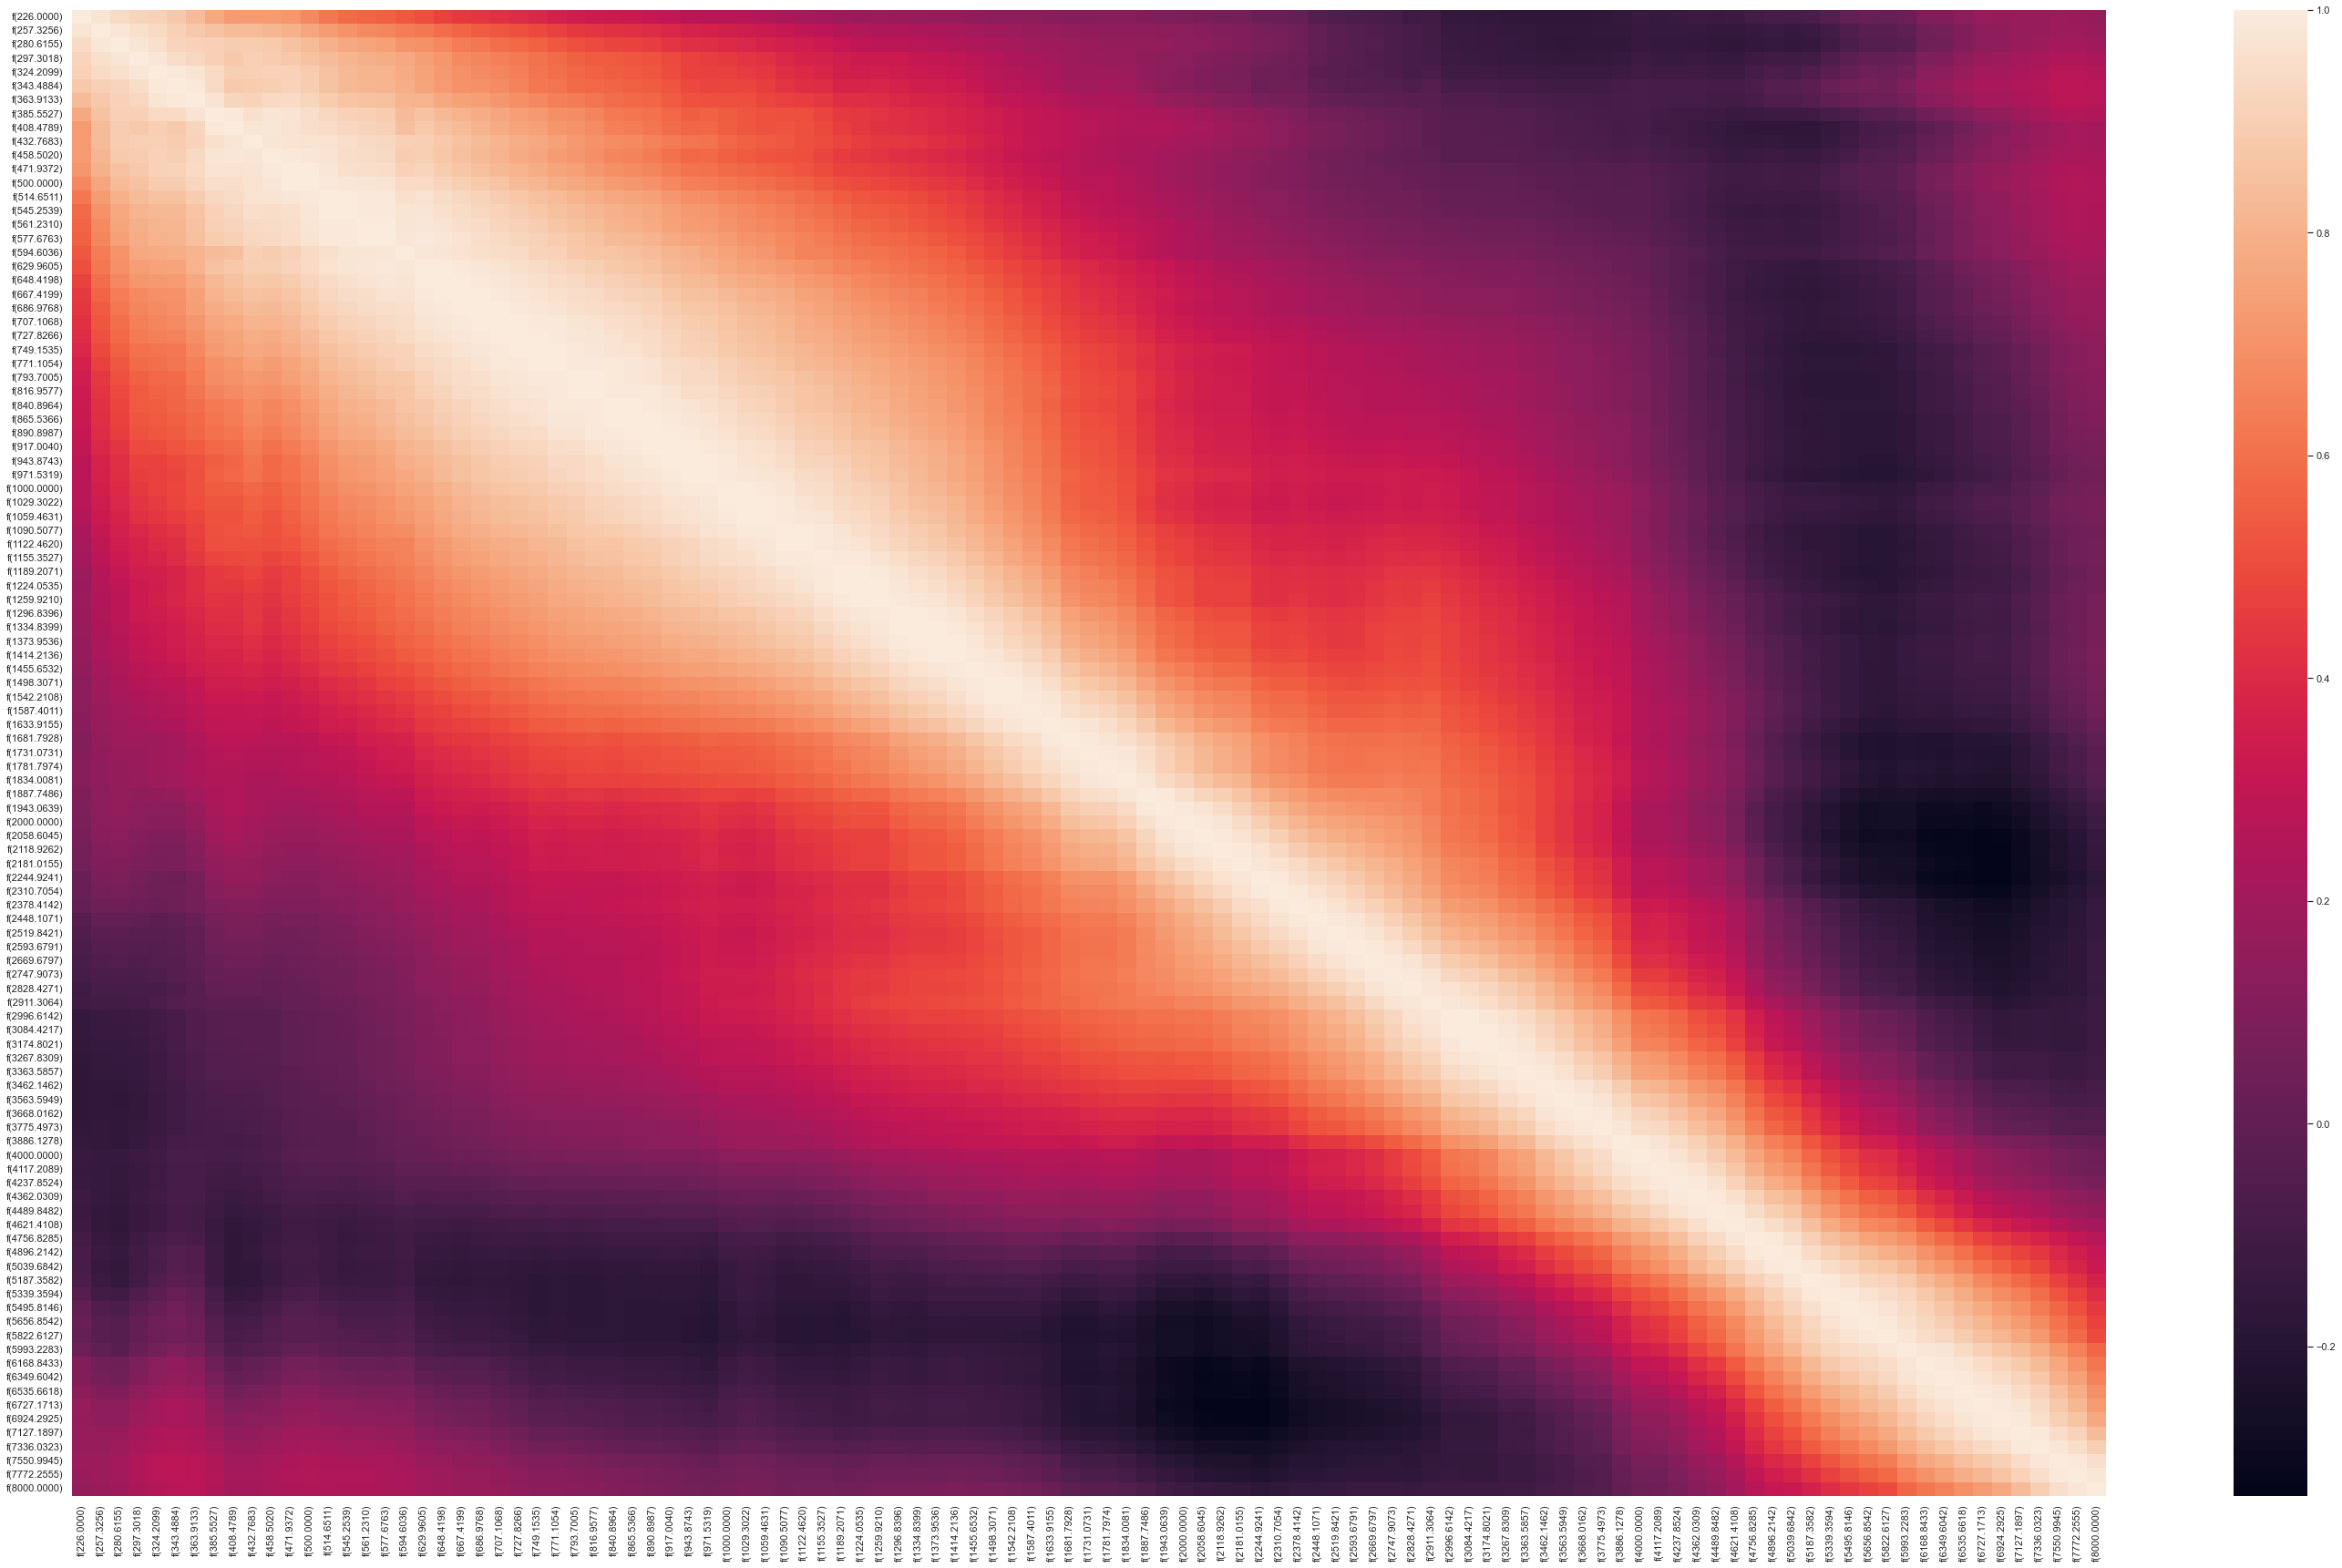

In [ ]:
corr_matrix_freq = df[freq_cols].corr()

sns.set(rc={'figure.figsize':(50,30)})
sns.heatmap(corr_matrix_freq)

## 2.2 Principal Components

To solve the multicollinearity issue, we conducted PCA. Preserving 99% of variance leads to 15 principal components. As we can see from the plot below, the principal components are uncorrelated, solving this issue.

<AxesSubplot:>

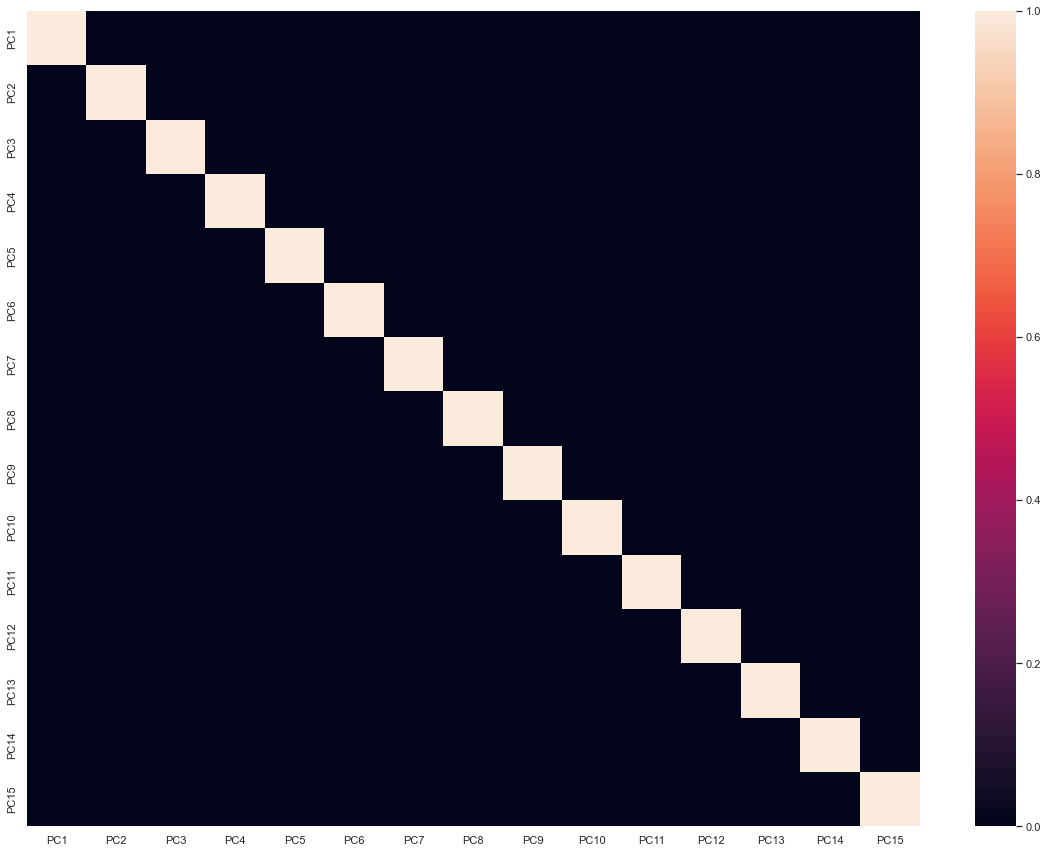

In [ ]:
corr_matrix_pca = df[pca_cols].corr()

sns.set(rc={'figure.figsize':(20,15)})
sns.heatmap(corr_matrix_pca)

In [ ]:
wba_df = df[freq_cols].melt()
pca_df = df[pca_cols].melt()
wba_df.head()
pca_df.head()

,variable,value
0,f(226.0000),0.0987
1,f(226.0000),0.1114
2,f(226.0000),0.1096
3,f(226.0000),0.0748
4,f(226.0000),0.1863


,variable,value
0,PC1,8.842811
1,PC1,0.409498
2,PC1,-4.250247
3,PC1,-3.358109
4,PC1,-6.687540


# 3.0 General Distributions

## 3.1 Box Plot per Frequency

It appears that the range for possible values for absorbance increases as frequency increases.

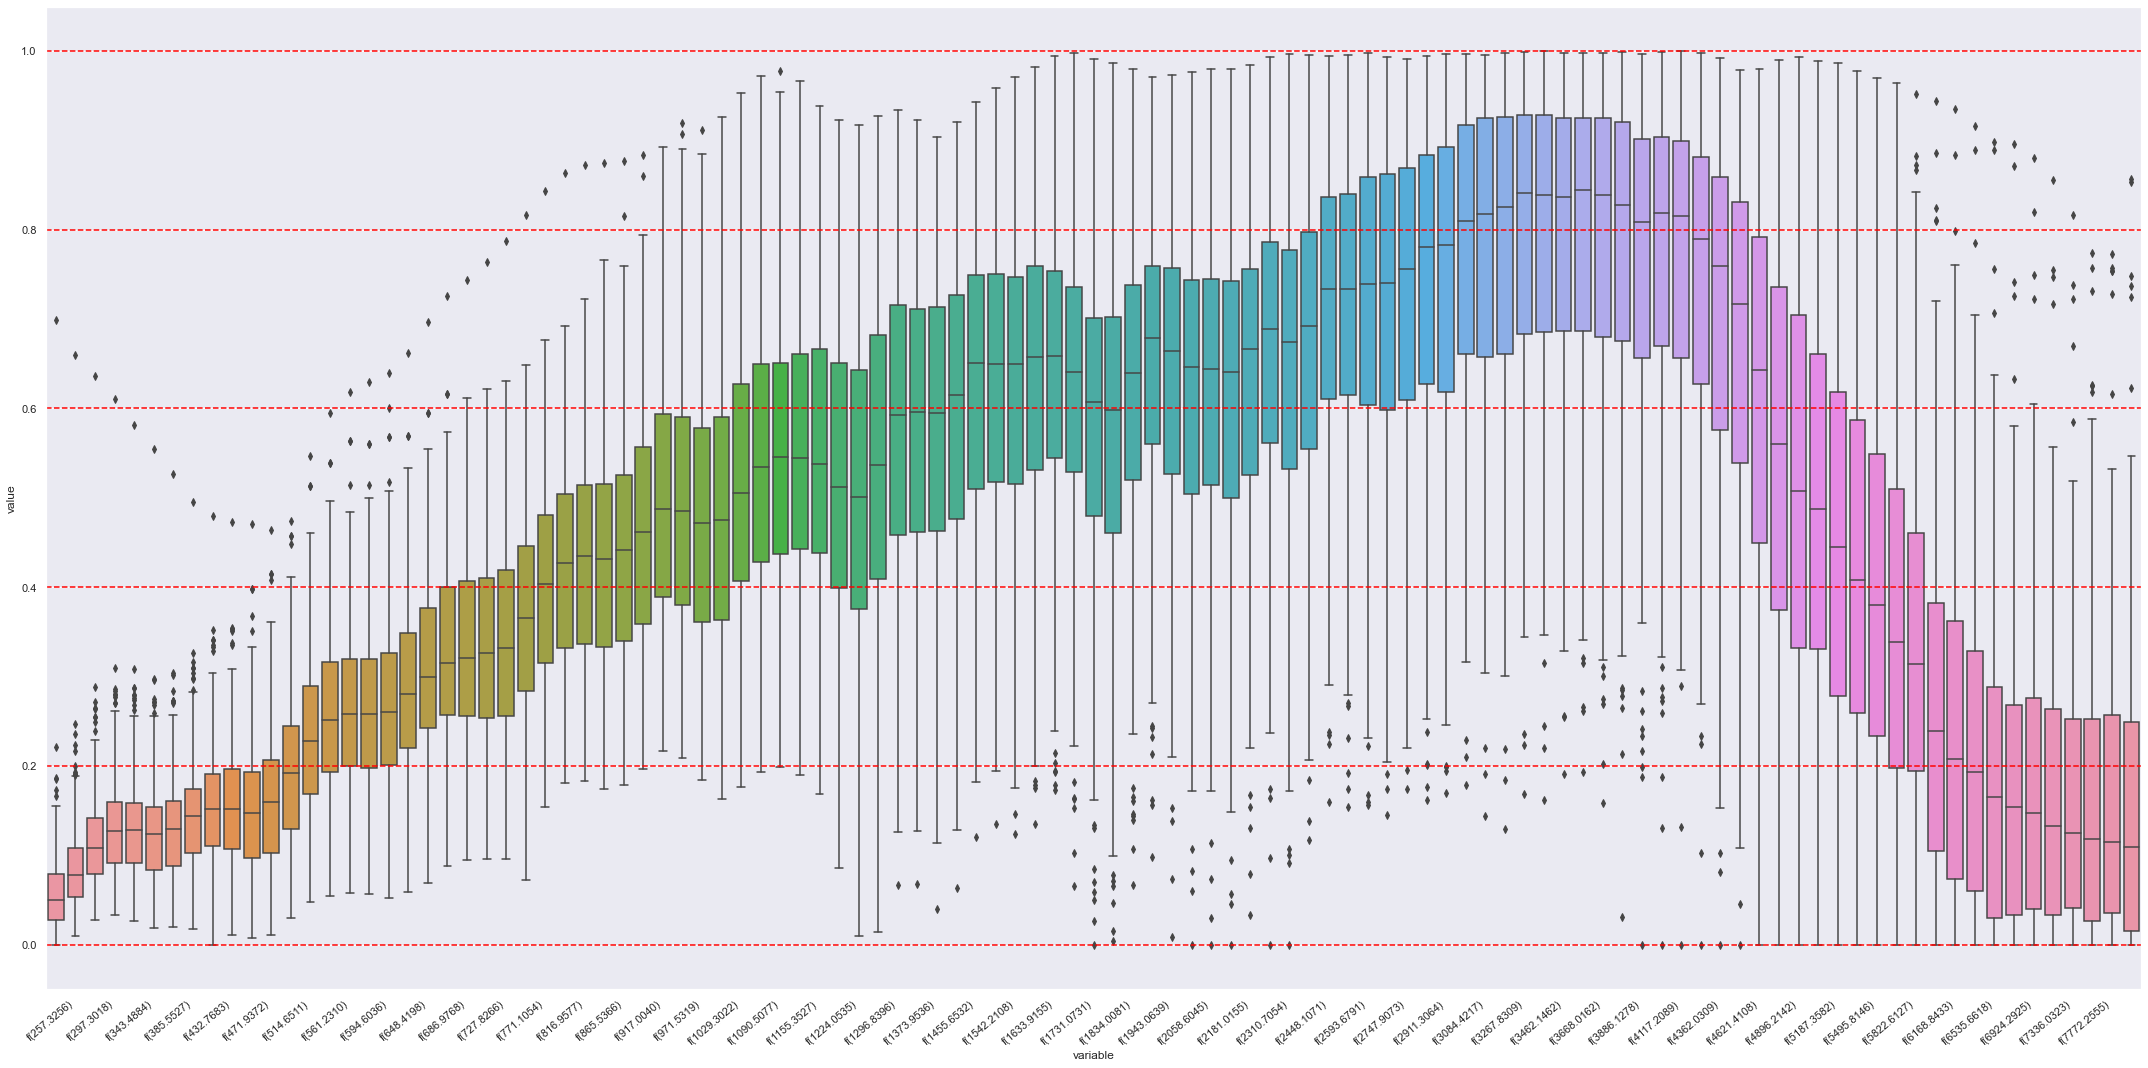

In [ ]:
sns.set(rc={'figure.figsize':(30,15)})
ax = sns.boxplot(x="variable", y="value", data=wba_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
ax.axhline(1.0, ls='--', color='red')
ax.axhline(0.8, ls='--', color='red')
ax.axhline(0.6, ls='--', color='red')
ax.axhline(0.4, ls='--', color='red')
ax.axhline(0.2, ls='--', color='red')
ax.axhline(0.0, ls='--', color='red')

sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)

plt.tight_layout()
plt.show();

## 3.2 Confidence Interval (95%) per Frequency

The mean and the 95% confidence interval is much tighter than the boxplot

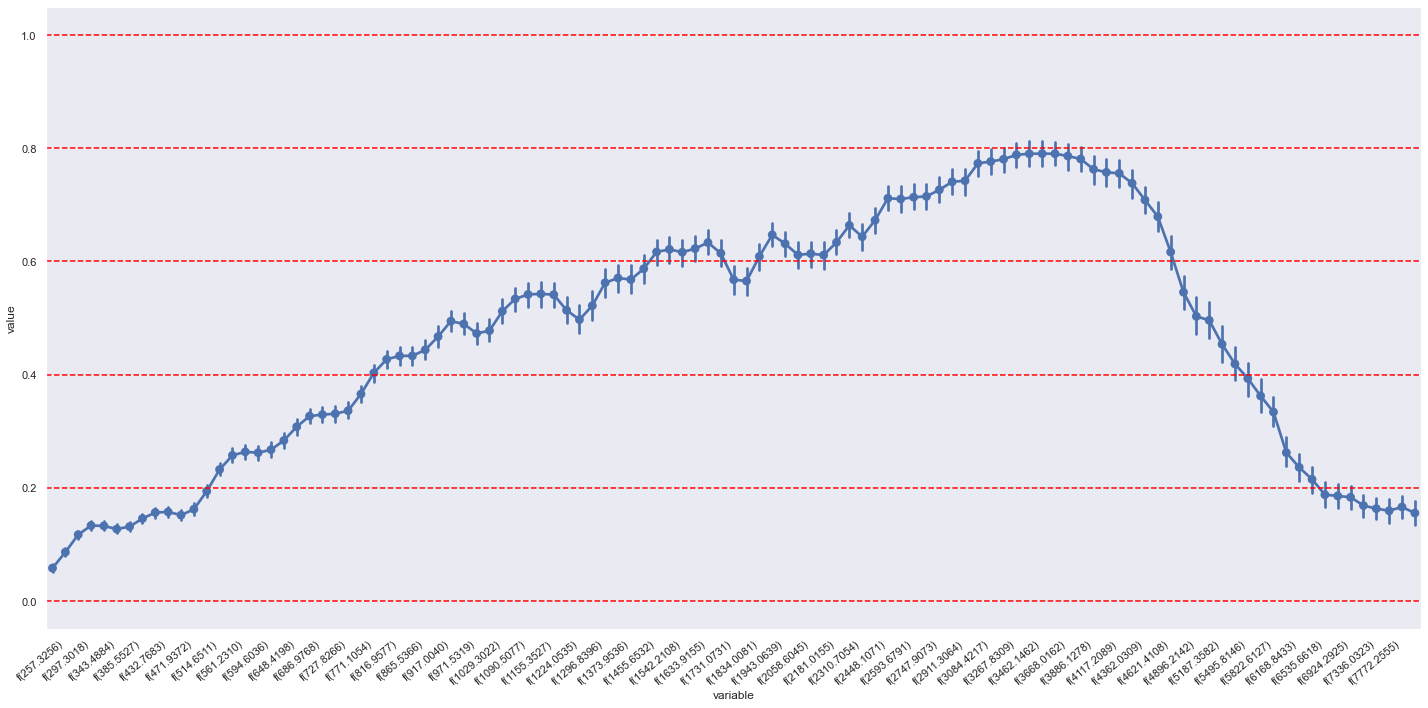

In [ ]:
ax = sns.pointplot(x='variable', y='value', data=wba_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
# ax.set(title = 'Mean and 95% Confidence Interval')
ax.axhline(1.0, ls='--', color='red')
ax.axhline(0.8, ls='--', color='red')
ax.axhline(0.6, ls='--', color='red')
ax.axhline(0.4, ls='--', color='red')
ax.axhline(0.2, ls='--', color='red')
ax.axhline(0.0, ls='--', color='red')

sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)

plt.tight_layout()
plt.show();

## 3.3 Frequency Histograms

### 3.3.1 Control Variables

It appears that most variables follow a normal distribution, which is a good sign. The `PTA` variables only have one value each (20), thus will not make for good control variables/predictors in our models.

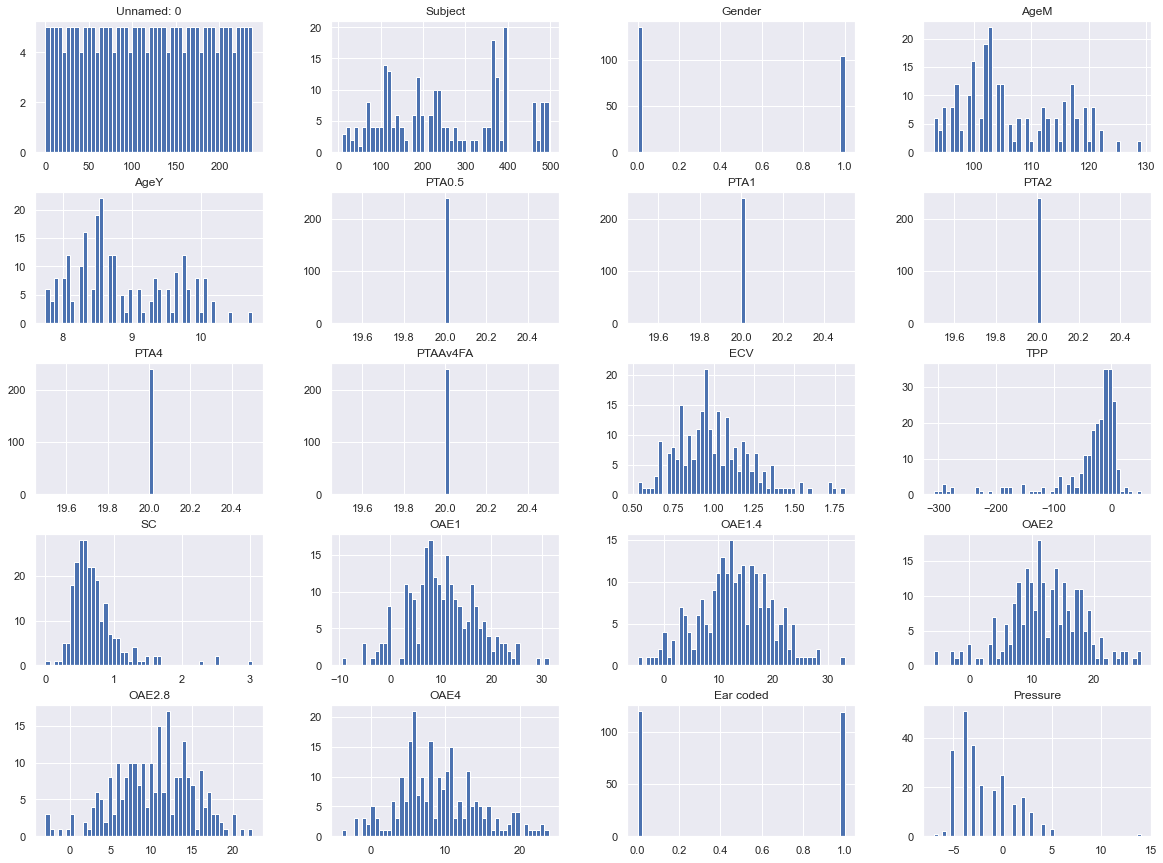

In [ ]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE

df[control_cols].hist(bins=50, figsize=(20,15))
plt.show();

### 3.3.2 Frequencies

The histograms for absorbance levels of different frequencies are quite intuitive. Lower frequencies' absorbance levels are right-skewed as individuals would likely have lower absorbance levels at low frequencies. As frequencies tend towards speech level, absorbance levels become increasingly left-skewed. As frequency goes beyond speech level, absorbance levels once again become right-skewed.

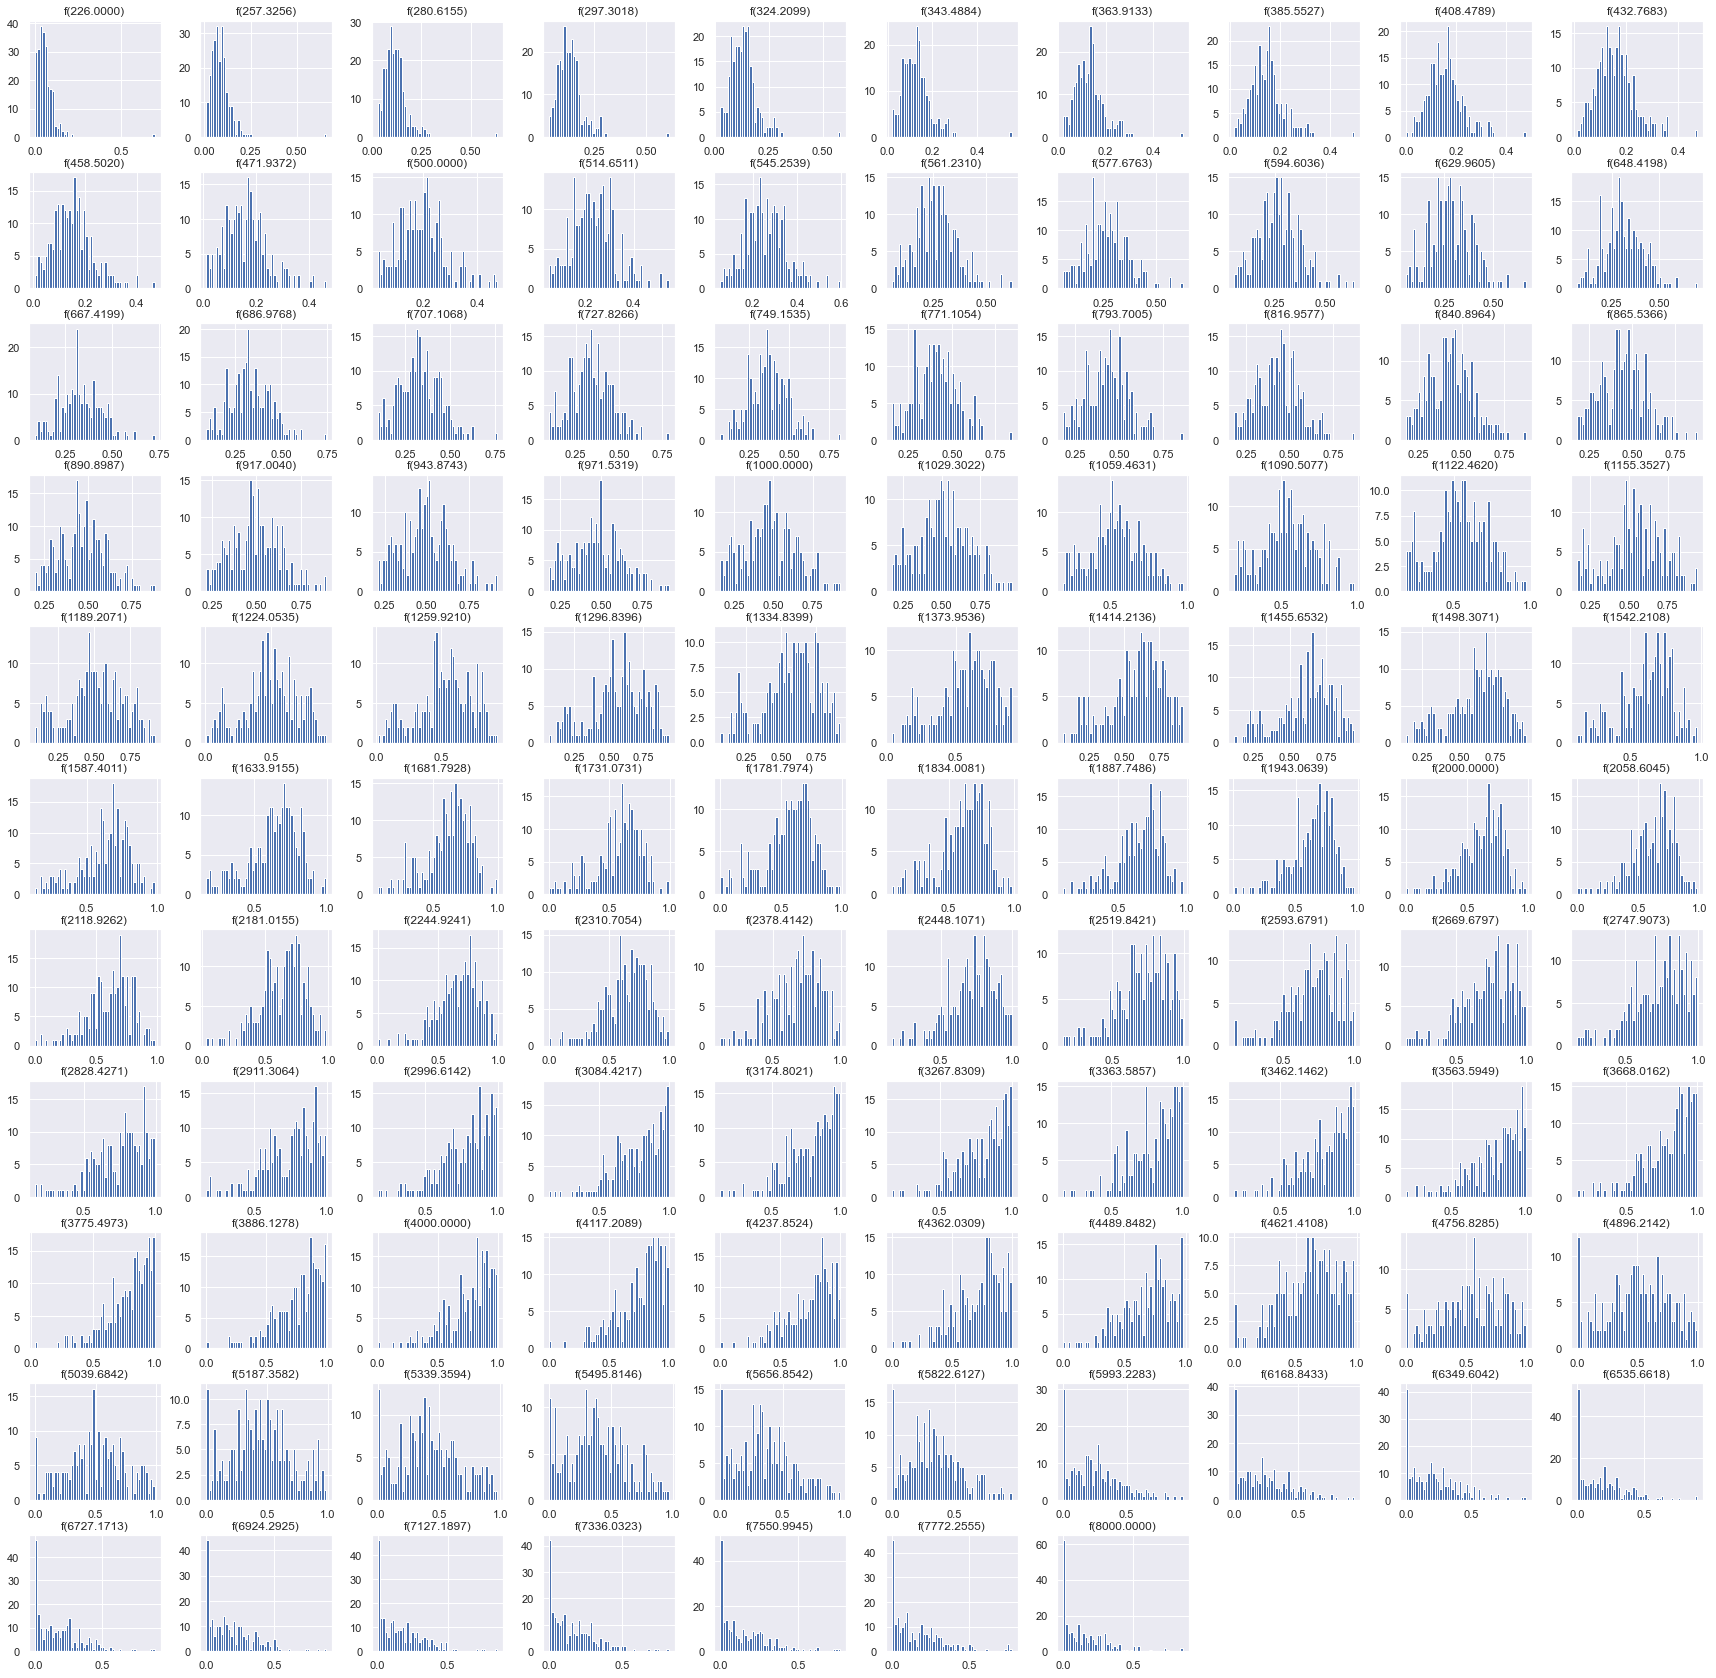

In [ ]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE

df[freq_cols].hist(bins=50, figsize=(30,30))
plt.show();

### 3.3.3 Principal Components

All principal components approximate normal distribution.

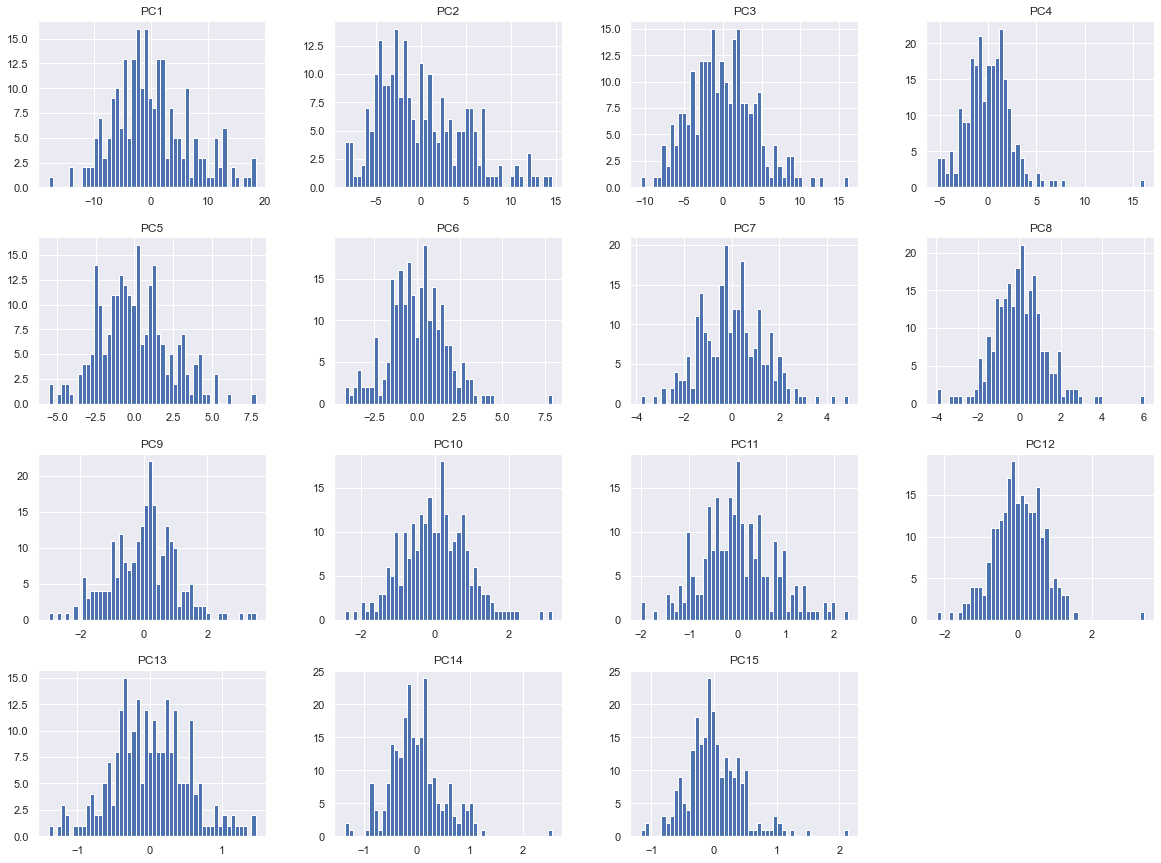

In [ ]:
%matplotlib inline
plt.rcParams['figure.facecolor'] = 'white' # Since I use a dark IDE

df[pca_cols].hist(bins=50, figsize=(20,15))
plt.show();

# 4.0 Overall Pass and Fail Comparison

Creating overall pass/fail dataframe in long format.

In [ ]:
overall_pof_df = df[['OverallPoF'] + freq_cols]
overall_pof_df = overall_pof_df.replace({'OverallPoF':{0: 'Pass', 1: 'Fail'}})
overall_pof_df = overall_pof_df.groupby('OverallPoF').mean()
overall_pof_df = overall_pof_df.melt(ignore_index=False)
overall_pof_df = overall_pof_df.reset_index()
overall_pof_df.head()

,OverallPoF,variable,value
0,Fail,f(226.0000),0.041516
1,Pass,f(226.0000),0.061494
2,Fail,f(257.3256),0.064055
3,Pass,f(257.3256),0.090849
4,Fail,f(280.6155),0.090771


## 4.1 Statistically Different: Overall Pass/Fail

We conduct a t-test at each frequency level (5% significance level) to see whether the difference in (mean) absorption between overall pass and fail instances is statistically significant.


In [ ]:
from scipy import stats

# Replacing 0 and 1 with Pass and Fail
df1 = df[['OverallPoF'] + freq_cols]
df1 = df1.replace({'OverallPoF':{0: 'Pass', 1: 'Fail'}})
df1 = df1.melt(id_vars=['OverallPoF'])

# Conducting t-tests
genders, frequencies = df1['OverallPoF'].unique(), df1['variable'].unique()
pvalues = []
for freq in frequencies:
    x1 = df1.loc[(df1['variable'] == freq) & (df1['OverallPoF'] == 'Pass')].value.to_list()
    x2 = df1.loc[(df1['variable'] == freq) & (df1['OverallPoF'] == 'Fail')].value.to_list()
    pvalue = stats.ttest_ind(x1, x2, equal_var=False).pvalue
    pvalues.extend([(freq, pvalue)])

The following plot has vertical red lines where the difference between mean absorbance between overall pass and fail instances is statisticall significant at that particular frequency. Based on this, the absorbance for the range of frequencies is statistically different between individuals that pass or fail some audiometry test at frequencies below ~4600Hz.

In [7]:
pvalue

NameError: name 'pvalue' is not defined

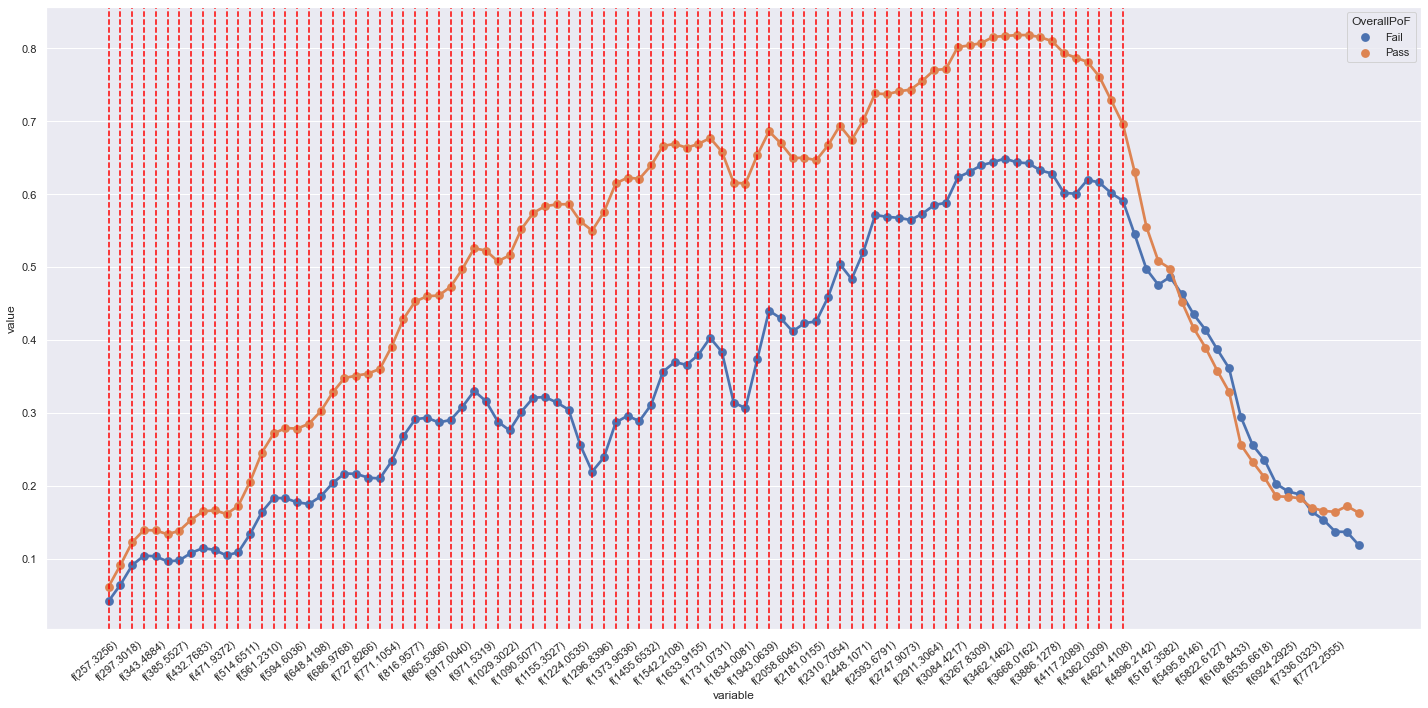

In [ ]:
# Plotting
ax = sns.pointplot(x='variable', y='value', hue='OverallPoF', data=overall_pof_df)

# Red line if p-value < 0.05 (significant difference between means)
for pvalue in pvalues:
    if pvalue[1] < 0.05:
        ax.axvline(pvalue[0], ls='--', color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

# Show only every 2 tick labels on x-axis
sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.tight_layout()
plt.show();

# 5.0 Control Variables

## 5.1 Gender

Creating long-format gender dataframe.

In [ ]:
gender_df = df[['Gender'] + freq_cols]
gender_df = gender_df.replace({'Gender':{0: 'Male', 1: 'Female'}})
gender_df = gender_df.groupby('Gender').mean()
gender_df = gender_df.melt(ignore_index=False)
gender_df = gender_df.reset_index()
gender_df.head()

,Gender,variable,value
0,Female,f(226.0000),0.051335
1,Male,f(226.0000),0.063696
2,Female,f(257.3256),0.077218
3,Male,f(257.3256),0.093807
4,Female,f(280.6155),0.104928


We will conduct a similar t-test as above, but this time to determine the statistical significance of differences between genders' absorption levels at each frequency.

In [ ]:
from scipy import stats

df2 = df[['Gender'] + freq_cols]
df2 = df2.replace({'Gender':{0: 'Male', 1: 'Female'}})
df2 = df2.melt(id_vars=['Gender'])

genders, frequencies = df2['Gender'].unique(), df2['variable'].unique()
pvalues = []
for freq in frequencies:
    x1 = df2.loc[(df2['variable'] == freq) & (df2['Gender'] == 'Male')].value.to_list()
    x2 = df2.loc[(df2['variable'] == freq) & (df2['Gender'] == 'Female')].value.to_list()
    pvalue = stats.ttest_ind(x1, x2, equal_var=False).pvalue
    pvalues.extend([(freq, pvalue)])

Interestingly, male and females have statistically significant differences in absorption levels at approximately the same frequencies as the pass/fail statistically significant zone.

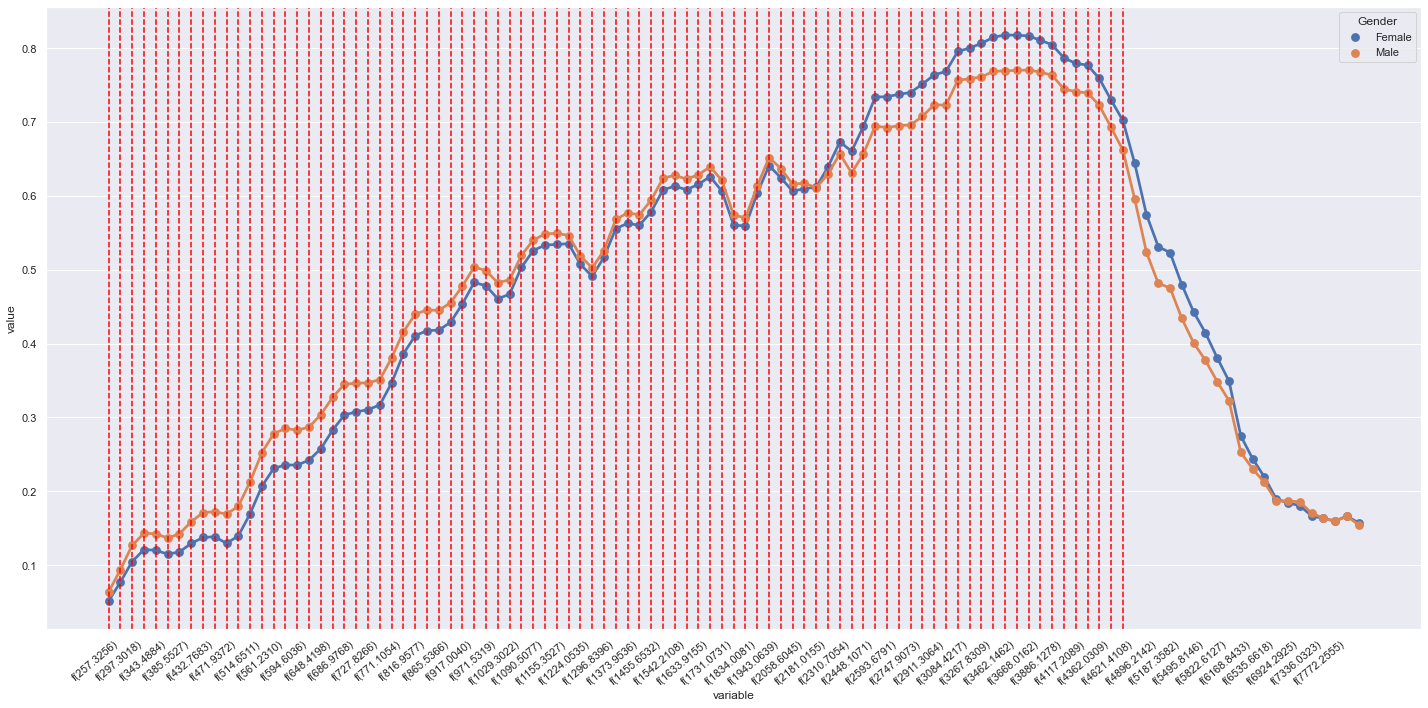

In [160]:
# Plotting
ax = sns.pointplot(x='variable', y='value', hue='Gender', data=gender_df)

# Red lines for p-value < 0.05 for t-test
for pvalue in pvalues:
    if pvalue[1] < 0.05:
        ax.axvline(pvalue[0], ls='--', color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.tight_layout()
plt.show();

## 5.2 Age ** ADD

In [83]:
age_df = df[['AgeY'] + freq_cols]
age_df['AgeY'] = age_df['AgeY'].apply(lambda x: round(x))
age_df = age_df.groupby('AgeY').mean()
age_df = age_df.melt(ignore_index=False)
age_df = age_df.reset_index()
age_df.head()

/var/folders/23/sqlb91r144d65txwr_x9qnp80000gn/T/ipykernel_39882/2404675221.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_df['AgeY'] = age_df['AgeY'].apply(lambda x: round(x))


,AgeY,variable,value
0,8,f(226.0000),0.052297
1,9,f(226.0000),0.057085
2,10,f(226.0000),0.070522
3,11,f(226.0000),0.030600
4,8,f(257.3256),0.082094


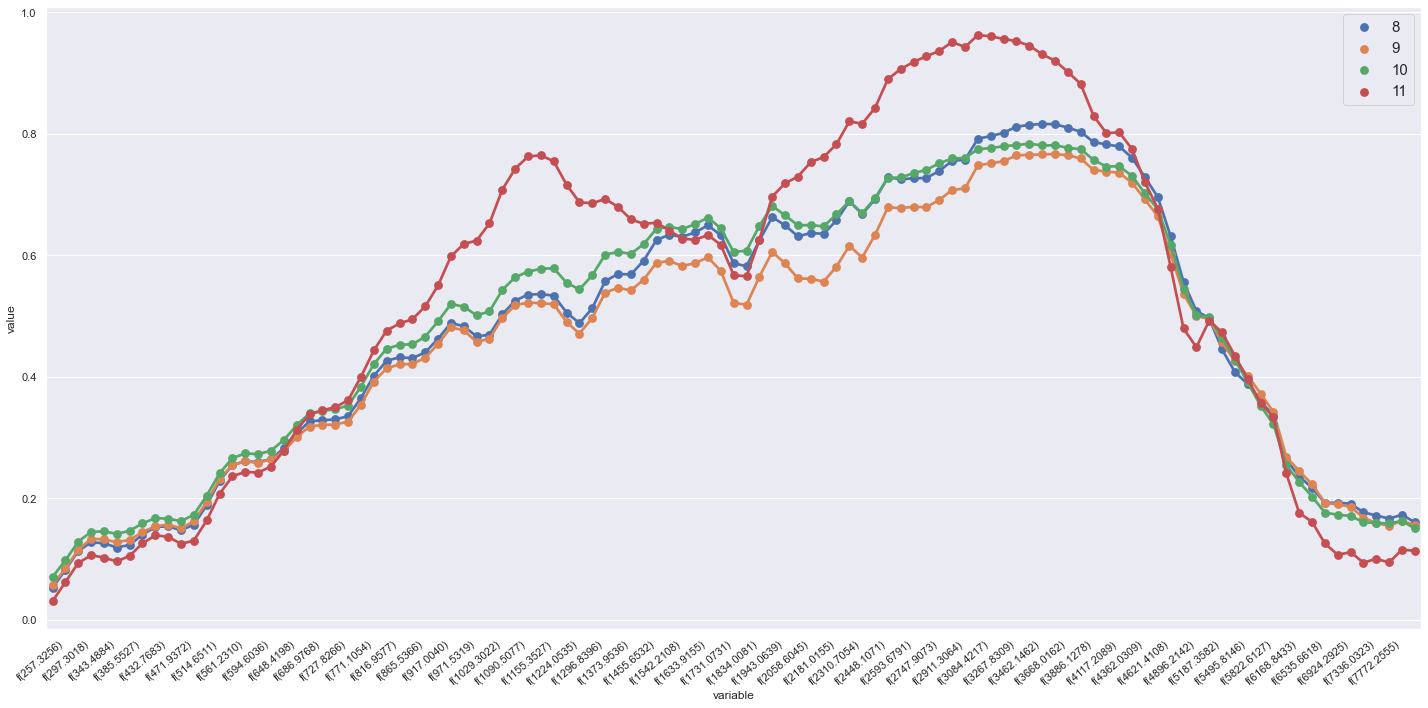

In [163]:
ax = sns.pointplot(x='variable', y='value', hue='AgeY', data=age_df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.tight_layout()
plt.legend(fontsize=15) # using a size in points
plt.show();

In [173]:
age_df = df[['EarSide'] + freq_cols]
age_df = age_df.groupby('EarSide').mean()
age_df = age_df.melt(ignore_index=False)
age_df = age_df.reset_index()
age_df

,EarSide,variable,value
0,Left,f(226.0000),0.052308
1,Right,f(226.0000),0.064376
2,Left,f(257.3256),0.081141
3,Right,f(257.3256),0.092082
4,Left,f(280.6155),0.112202
...,...,...,...
209,Right,f(7550.9945),0.161009
210,Left,f(7772.2555),0.166271
211,Right,f(7772.2555),0.166439
212,Left,f(8000.0000),0.157177


In [174]:
from scipy import stats

df3 = df[['EarSide'] + freq_cols]
df3 = df3.melt(id_vars=['EarSide'])

genders, frequencies = df3['EarSide'].unique(), df3['variable'].unique()
pvalues = []
for freq in frequencies:
    x1 = df3.loc[(df2['variable'] == freq) & (df3['EarSide'] == 'Left')].value.to_list()
    x2 = df3.loc[(df2['variable'] == freq) & (df3['EarSide'] == 'Female')].value.to_list()
    pvalue = stats.ttest_ind(x1, x2, equal_var=False).pvalue
    pvalues.extend([(freq, pvalue)])

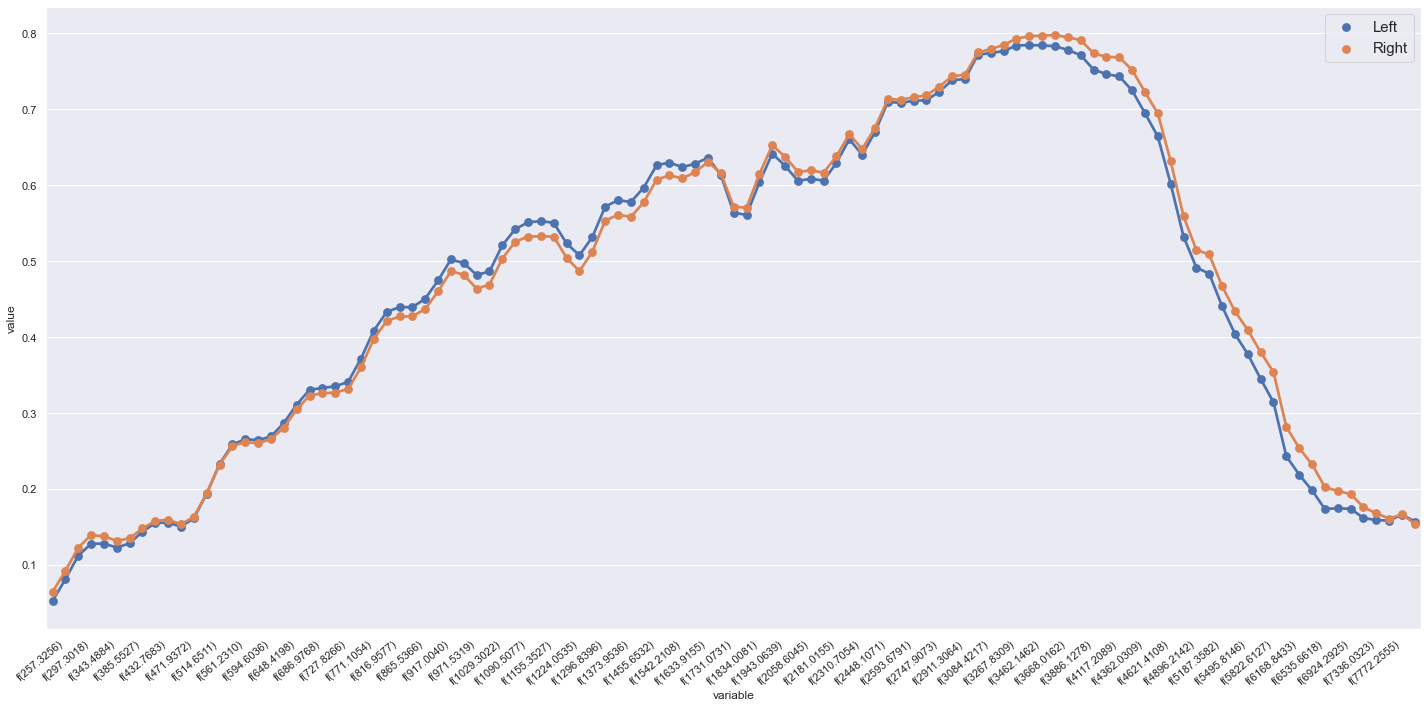

In [175]:
ax = sns.pointplot(x='variable', y='value', hue='EarSide', data=age_df)
for pvalue in pvalues:
    if pvalue[1] < 0.05:
        ax.axvline(pvalue[0], ls='--', color='red')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

sns.set(rc={'figure.figsize':(20,10)})
plt.setp(ax.get_xticklabels()[::2], visible=False)
plt.tight_layout()
plt.legend(fontsize=15) # using a size in points
plt.show();